In [28]:
import networkx as nx
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
from collections import defaultdict

In [29]:
#df = pd.read_csv('valuesAdjList.csv')
df = pd.read_csv('data/valuesMatrix.csv')
df.columns
df.head()

,name,lvl
0,none,1
1,little,2
2,some,3
3,more,4
4,all,5


In [30]:
nameDict = df['name']
nameDict[0]
df = df.drop('name',axis=1)
df[df['lvl'] < 10] -= 1
df.head()


,lvl
0,0
1,1
2,2
3,3
4,4


In [31]:
adjList = defaultdict(list)

for idx, name in enumerate(nameDict):
    adjList[idx] = (df.iloc[idx][0], name)
adjList[4]

(4, 'all')

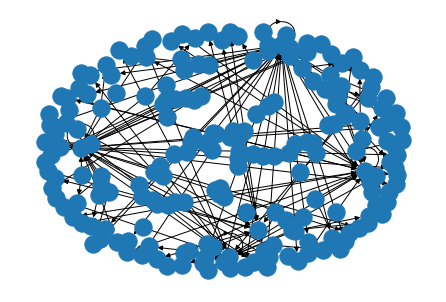

In [32]:
# valuesNumpyArray = df.to_numpy()
# valuesNumpyArray[0:10]
G = nx.DiGraph(adjList)
nx.draw(G, with_labels=False)